<a href="https://colab.research.google.com/github/stanleyhuang12/ds110/blob/main/Stanley_HuangDS110_F24_HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW8 (70 points total)

# Problem 1:   Forwarding the mail (8 points)

There's just one email address for *Handy Home Helpers*, but there are three kinds of things the business does, each of which is handled by a different associate.  Alice handles bathroom work - clogged toilets and drains, mold removal, leaks.  Bob handles HVAC work - air conditioning and heating, mostly.  Chun does appliance repair:  dishwashers, washers, driers.  They'd like to have a script that can forward emails sent to the main address to the right associate.

Write a function *forward(text, wv)* that reads the email *text* and returns the email address of the associate to whom the email should be forwarded ("alice@hhh.com", "bob@hhh.com", or "chun@hhh.com").  To do this, your code should create a vector for each associate that represents their interests overall, and return the email of the associate whose vector is closest in angle to the vector of the email.  Use *find_avg_word_vector()* and *find_cosine()* from lecture, and make use of the provided topic strings.  Break ties among the associates alphabetically, so for example Alice gets the mail if she's tied for closest.

In [81]:
alice = 'bathrooom toilet clogged drain mold leaks'
bob = 'air-conditioning AC heating cooling vents air'
chun = 'appliances dishwashers washer drier repair'

In [3]:
# May need to !pip install gensim if working locally
import gensim
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [86]:
# TODO:  get relevant functions from lecture notes
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt') # Name means 'period' in German; from Kiss and Strunk 2006
nltk.download('stopwords')

alice_split = alice.split()
bob_split = bob.split()
chun_split = chun.split()

embedding_vec_alice = np.mean([wv[word] for word in alice_split if word in wv], axis=0) #Axis = 0 means average across rows
embedding_vec_bob = np.mean([wv[word] for word in bob_split if word in wv], axis =0)
embedding_vec_chun = np.mean([wv[word] for word in chun_split if word in wv], axis =0)

classify_list = [embedding_vec_alice, embedding_vec_bob, embedding_vec_chun]
contact = ['alice@hhh.com', 'bob@hhh.com', 'chun@hhh.com']



def find_cosine(vec1, vec2):
  unit_vec1 = vec1/np.linalg.norm(vec1)
  unit_vec2 = vec2/np.linalg.norm(vec2)
  return np.dot(unit_vec1,unit_vec2)

stop_words = set(stopwords.words('english'))

def forward(text, wv):
  lst = word_tokenize(text.lower())
  filtered_text = [word for word in lst if word not in stop_words]
  text_embed = [wv[word] for word in filtered_text if word in wv]
  array_embed = np.mean(np.array(text_embed), axis=0)
  print(len(array_embed))
  cosine_sim_lst = []
  for embedding, name_vec in zip(classify_list, contact):
    cosine_similarity = find_cosine(embedding, array_embed)
    cosine_sim_lst.append((cosine_similarity, name_vec))
  cosine_sim_lst.sort(reverse=True)
  return cosine_sim_lst[0][1]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [87]:
# Test1: Expect 'alice@hhh.com'
test1 = "Tried a plunger and no luck.  Help!"

forward(test1, wv)

300


'alice@hhh.com'

In [88]:
#Test2: Expect 'bob@hhh.com'
test2 = "So hot - I think the thermostat is busted..."
forward(test2, wv)

300


'bob@hhh.com'

In [89]:
#Test3: Expect 'chun@hhh.com'
test3 = "I need to fix my dishwasher - suds flood the kitchen every time I run it"
forward(test3, wv)

300


'chun@hhh.com'

# Problem 2:  Price of Milk Interpolation (7 points)

The following y values represent the average price of a gallon of milk for each year. (Source: https://www.usinflationcalculator.com/inflation/milk-prices-adjusted-for-inflation/) Perform linear regression with scikit-learn's LinearRegression class.  Then plot the points alongside the linear fit.  And finally, make a prediction for 2023 with this linear model.

In [110]:
import numpy as np
x = np.linspace(1995, 2021, 27)
y = [2.48, 2.62, 2.61, 2.70, 2.84,
     2.78, 2.88, 2.76, 2.76, 3.16, 3.19, 3.08, 3.50, 3.80, 3.11,
     3.26, 3.57, 3.49, 3.46, 3.69, 3.42, 3.20, 3.23, 2.90, 3.04,
     3.32, 3.55]

In [114]:
print(len(x))
print(x)
print(type(x))

len(y)

27
[1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006.
 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018.
 2019. 2020. 2021.]
<class 'numpy.ndarray'>


27

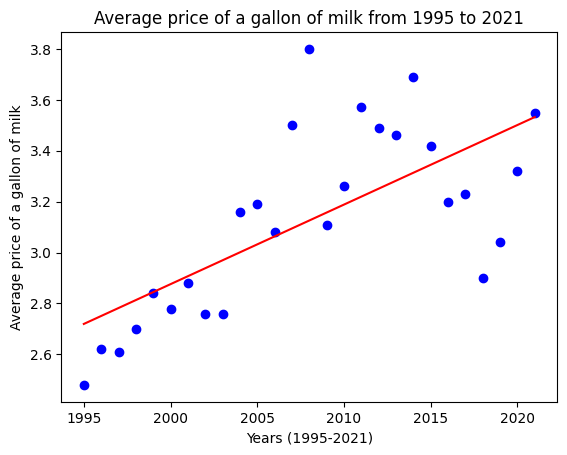

In [104]:
# TODO linear regression and plot

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

reg = LinearRegression()
x = x.reshape(-1, 1)
reg.fit(x, y)
y_pred_line = reg.predict(x)


plt.scatter(x, y, color = "blue")
plt.plot(x, y_pred_line, color = "red")
plt.title("Average price of a gallon of milk from 1995 to 2021")
plt.xlabel("Years (1995-2021)")
plt.ylabel("Average price of a gallon of milk")
plt.show()


In [125]:
# TODO: Prediction for 2023
x_pred = np.array([2023])
x_pred = x_pred.reshape(-1, 1)
y_pred = reg.predict(x_pred)
y_pred = y_pred.item()
print(f' The predicted average price of a gallon of milk in 2023 is around ${y_pred:.2f}. ')

 The predicted average price of a gallon of milk in 2023 is around $3.59. 


# Problem 3:  Cumulative problems (35 points)

a (20 points):  Suppose we have a matrix where the $m$ rows represent different observations and the $n$ columns represent different features of the same example.  We also have an $(m-v)$-element 1D numpy array of labels for the training examples, 0 or 1, and a $v$ element numpy array with labels for the validation examples (which all come after the training examples in the feature matrix).  We'd like to train a bunch of decision trees, checking what happens when we train with all possible combinations of the following constructor parameters:  max_depth (2, 10, or None), min_samples_leaf (1 or 2), and max_features ('sqrt' or None).  The best tree is the one with the highest accuracy on the validation set.  Write a function find_best_params() that tries all combinations of the features and values described above.  Return the validation accuracy of the best tree, the max_depth of the best tree, the min_samples_leaf of the best tree, and the max_features of the best tree.

In [174]:
import numpy as np

# Small example for basic testing - things should run
examples_example = np.array([[1, 2, 3], [-1, -2, -3], [3, 4, -2], [-6, 4, 1], [1, 2, -4], [1,1,1]])
train_labels_example = np.array([1, 0, 1, 0])
validation_labels_example = ([0, 1])


# Bigger example where params may matter
from sklearn.datasets import make_classification
big_examples, big_labels = make_classification(n_samples=200, n_features=20, n_classes=2, shuffle=True, random_state=0)
big_labels_train = big_labels[:150]
big_labels_valid = big_labels[150:]

(4, 3)

In [179]:

# TODO: find_best_params()

from sklearn.tree import DecisionTreeClassifier

def find_best_params(x, y_train, y_valid):
  m = len(y_train)
  x_train = x[:m]
  x_test = x[m:]
  y_train = y_train.reshape(-1,1)
  max_depth = [2, 10, None]
  min_samples_leaf = [1, 2]
  max_features = ['sqrt', None]
  accuracy = 0
  for depth in max_depth:
    for leaf in min_samples_leaf:
      for features in max_features:
        classifier = DecisionTreeClassifier(max_depth=depth,
                                            min_samples_leaf=leaf,
                                            max_features=features,
                                            random_state=0)
        classifier.fit(x_train, y_train)
        y_pred = classifier.predict(x_test)
        score = classifier.score(x_test, y_valid)
        if score > accuracy:
          accuracy = score
          best_params = {
              'max_depth': depth,
              'min_samples_leaf': leaf,
              'max_features': features,
          }
  return accuracy, best_params

In [180]:

# With random_state = 0 passed to DecisionTreeClassifier,
# accuracy 0.5 - other parameter values depend on order of evaluation

find_best_params(examples_example, train_labels_example, validation_labels_example)

(0.5, {'max_depth': 2, 'min_samples_leaf': 1, 'max_features': None})

In [181]:
# With random_state = 0 passed to DecisionTreeClassifier,
# Accuracy of 0.9, max_depth varies, min_samples_leaf 1, max_features None
find_best_params(big_examples, big_labels_train, big_labels_valid)

(0.9, {'max_depth': 2, 'min_samples_leaf': 1, 'max_features': None})

b (15 points):  You are analyzing a long document that happens to mention who reports to who in an organization - for example, "Mary reports to Alice".  Write a function print_reports() that analyzes such a string, pulling out all such relationships.  (You can assume the document literally says "X reports to Y" with X and Y being the names.). Then print for each person the number of "direct reports" that person has, that is, the number of people reporting to them.  (See the tests for examples).  Return the total number of people in the organization.

In [212]:
# TODO print_reports()

import re
from collections import defaultdict


def print_reports(text):
    pattern = r'(\w+) reports to (\w+)'
    matches = re.findall(pattern, text)

    direct_reports = defaultdict(int)
    people = set()

    for person, manager in matches:
        direct_reports[manager] += 1
        people.add(person)
        people.add(manager)

    for person in people:
        if person not in direct_reports:
            direct_reports[person] = 0

    for person in sorted(people):
        print(f"{person} {direct_reports[person]}")
    return len(people)

In [213]:
set(['James', 'Keynes', 'Robert', 'James'])

{'James', 'Keynes', 'Robert'}

In [214]:

text = "Mary reports to Sally, Sally reports to Bob, Bob reports to Alice, \
        but also Yilan reports to Sally, and Medhavi reports to Alice"
# Expect Sally 2, Mary 0, Bob 1, Yilan 0, Medhavi 0, Alice 2
# (in no particular order) and return 6
print_reports(text)

Alice 2
Bob 1
Mary 0
Medhavi 0
Sally 2
Yilan 0


6

In [215]:
# Don't crash on this
text = "This document has no information"
print_reports(text)

0

In [216]:
# Expect Alice 4, all others 0, total people 5
text = "Bob reports to Alice and Dominique reports to Alice, \
        not to mention Jason reports to Alice and Clive reports to Alice"
print_reports(text)

Alice 4
Bob 0
Clive 0
Dominique 0
Jason 0


5

# Problem 4:  Miniproject (20 points + up to 15 points extra credit)

This problem has an open-ended component.  You can get full credit by doing the problem set with the *suggested* data set (spotify.csv), but you can get **extra credit** by doing it with a different dataset that you have found on the Internet (for example, on Kaggle.com) and/or doing more analysis than required.  You also have the opportunity to get **additional extra credit applied to your final exam grade** if you are selected to give a lightning talk on Dec 6 about what you found with this project.  The lightning talk is only possible if you chose your own dataset.

The suggested dataset, guaranteed to have minimal data cleaning but not eligible for extra credit, is the file spotify.csv, which originally came from https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset but which you can now find on Blackboard where you found this assignment.  (For a description of what its features mean, see https://developer.spotify.com/documentation/web-api/reference/get-audio-features.)  We'll assume in the instructions that if you're using that dataset, you're trying to predict genre from the other numerical features.

If you choose your own dataset, pick one where you think it would be interesting but feasible to predict some variable in the dataset from the others.  If it needs a lot of "cleaning" to be usable, you will get extra credit, but you could also consider looking at a few datasets and picking one that seems somewhat close to directly usable.  (You do *not* need high accuracy in your classifier to get full or extra credit; problems like predicting stock prices from their histories are inherently harder than classifying country from latitude and longitude, for example.)

a 5 points + 7 points EC) Load the dataset as a DataFrame and prepare it for machine learning.  In the spotify.csv case, we suggest using a sklearn.preprocessing.LabelEncoder to turn the target column into numerical classes; see examples in the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).  You should also fix any columns that look basically numerical, but for some reason were processed as strings instead; but the suggested dataset doesn't have any of these.

If you are cleaning a novel dataset, you may get extra credit here if it takes more work than the spotify dataset to clean.

Suggested dataset EC:  For the suggested dataset, you will get better results if you limit the target genres to four easily distinguished categories, such as 'acoustic', 'dance', 'grunge', and 'show-tunes'.  You can use .unique() to see all the categories available in this column.  Choosing your own 4 categories from unique() is worth 1 point of extra credit.  Limiting the classes like this is otherwise optional.

In [218]:
# TODO (may want to break this into several code boxes)

from google.colab import files
import pandas as pd


upload = files.upload()


Saving fetal_health.csv to fetal_health.csv


In [219]:
df = pd.read_csv("fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [260]:
print(df.dtypes) # All numeric columns
print(df.isnull().sum()) # No missing data
print(len(df))

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [254]:
import re

columns_to_drop = []
for idx, value in enumerate(df.columns):
  pattern = "histogram_(\w+)"
  matches = re.findall(pattern, value)
  if matches:
    print(idx, matches)
    columns_to_drop.append(df.columns[idx])

new_df = df.drop(columns=columns_to_drop, axis = 1)
new_df

11 ['width']
12 ['min']
13 ['max']
14 ['number_of_peaks']
15 ['number_of_zeroes']
16 ['mode']
17 ['mean']
18 ['median']
19 ['variance']
20 ['tendency']


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,2.0


b, 7 points) Try predicting your target variable using a RandomForestClassifier from scikit-learn, with all the other numerical features in the dataset as your features.  You can create a dataframe that includes just your numeric features with df.select_dtypes(include='number'), and drop your target (to-be-predicted) column from your features if you need to with df = df.drop(columns=['target']).  (The suggested dataset should also drop the first 'Unnamed' column - that row number predicts the genre number pretty well in that dataset!)  Use a train-test split with 10% of the data in the test set, and evaluate the accuracy on the test set.

In [320]:
# TODO
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = new_df.select_dtypes(include="number").drop(columns = ['fetal_health'])
y = new_df['fetal_health']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 110)

classifier = RandomForestClassifier(n_estimators=150, random_state=110)
classifier.fit(X_train, y_train)
accuracy = classifier.score(X_test, y_test)
accuracy = accuracy * 100
print(f"The accuracy score of this model is approximately {accuracy:.2f}%")

feature_names = list(X.columns)
for idx, obj in enumerate(zip(feature_names, classifier.feature_importances_)):
  name, feature = obj
  feature = feature*100
  print(f"{name} has {feature:.2f}% importance")

The accuracy score of this model is approximately 92.96%
baseline value has 9.48% importance
accelerations has 6.53% importance
fetal_movement has 3.59% importance
uterine_contractions has 6.48% importance
light_decelerations has 2.66% importance
severe_decelerations has 0.34% importance
prolongued_decelerations has 10.09% importance
abnormal_short_term_variability has 19.02% importance
mean_value_of_short_term_variability has 17.09% importance
percentage_of_time_with_abnormal_long_term_variability has 14.83% importance
mean_value_of_long_term_variability has 9.88% importance


c, 4 points) Choose one argument to RandomForestClassifier besides n_estimators that you vary to try to improve your classifier's accuracy.  (See documentation here:  https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)  Train three different classifiers with different values for this parameter, counting the one you already trained.

In [321]:
# TODO variation 2

classifier_2 = RandomForestClassifier(n_estimators=150, max_depth = 10, random_state=110)
classifier_2.fit(X_train, y_train)
accuracy = classifier_2.score(X_test, y_test)
accuracy = accuracy * 100
print(f"The accuracy score of this model is approximately {accuracy:.2f}%")

for idx, obj in enumerate(zip(feature_names, classifier_2.feature_importances_)):
  name, feature = obj
  feature = feature*100
  print(f"{name} has {feature:.2f}% importance")

The accuracy score of this model is approximately 93.90%
baseline value has 9.24% importance
accelerations has 6.95% importance
fetal_movement has 3.71% importance
uterine_contractions has 6.27% importance
light_decelerations has 2.61% importance
severe_decelerations has 0.32% importance
prolongued_decelerations has 10.47% importance
abnormal_short_term_variability has 19.03% importance
mean_value_of_short_term_variability has 17.36% importance
percentage_of_time_with_abnormal_long_term_variability has 14.45% importance
mean_value_of_long_term_variability has 9.58% importance


In [322]:
# TODO variation 3

classifier_3 = RandomForestClassifier(n_estimators=100, max_depth = 10, min_samples_leaf=2, random_state=110)
classifier_3.fit(X_train, y_train)
accuracy = classifier_3.score(X_test, y_test)
accuracy = accuracy * 100
print(f"The accuracy score of this model is approximately {accuracy:.2f}%")

for idx, obj in enumerate(zip(feature_names, classifier_3.feature_importances_)):
  name, feature = obj
  feature = feature*100
  print(f"{name} has {feature:.2f}% importance")

The accuracy score of this model is approximately 93.43%
baseline value has 9.03% importance
accelerations has 6.82% importance
fetal_movement has 3.29% importance
uterine_contractions has 6.07% importance
light_decelerations has 2.29% importance
severe_decelerations has 0.21% importance
prolongued_decelerations has 10.71% importance
abnormal_short_term_variability has 19.15% importance
mean_value_of_short_term_variability has 17.95% importance
percentage_of_time_with_abnormal_long_term_variability has 15.59% importance
mean_value_of_long_term_variability has 8.89% importance


d, 2 points) Use the *_feature_importances* attribute of the RandomForestClassifier to find the relative importances of all your features in your best model.

In [341]:
# TODO


columns = ['Model 1: N_Estimators = 100', 'Model 2: Max_Depth = 10', 'Model 3: Min_Samples_Leaf = 2']
imp_feature_matrix = np.array((classifier.feature_importances_, classifier_2.feature_importances_, classifier_3.feature_importances_))
imp_df = pd.DataFrame(imp_feature_matrix.T, index=feature_names, columns = columns)
imp_df


,Model 1: N_Estimators = 100,Model 2: Max_Depth = 10,Model 3: Min_Samples_Leaf = 2
baseline value,0.094843,0.092442,0.090273
accelerations,0.065319,0.069467,0.068174
fetal_movement,0.035944,0.037148,0.032876
uterine_contractions,0.064779,0.062693,0.060741
light_decelerations,0.026636,0.026092,0.022862
severe_decelerations,0.003370,0.003152,0.002109
prolongued_decelerations,0.100949,0.104715,0.107135
abnormal_short_term_variability,0.190193,0.190291,0.191515
mean_value_of_short_term_variability,0.170868,0.173620,0.179461
percentage_of_time_with_abnormal_long_term_variability,0.148254,0.144544,0.155930


e, up to 8 points EC) In this step, perform some additional analysis of your choice on your dataset, such as looking at correlations, performing statistical tests, or training a different machine learning classifier or regression.  You could also plot data for credit, using scatter plots, bar charts, or other visualizations.  Choose your methods with an eye toward being interesting for step (f).  This step is extra credit.

In [255]:
# maybe-TODO anything here:  correlations, statistical tests, other machine learning...
import seaborn as sns

correlation_matrix = new_df.corr()
mask = np.array(np.ones((correlation_matrix.shape[0], correlation_matrix.shape[1]))) # Mask upper triangular portion
upper_tri_mask = np.triu(mask)

upper_tri_mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

Text(0.5, 1.0, 'Correlation Matrix of Fetal Health Characteristics')

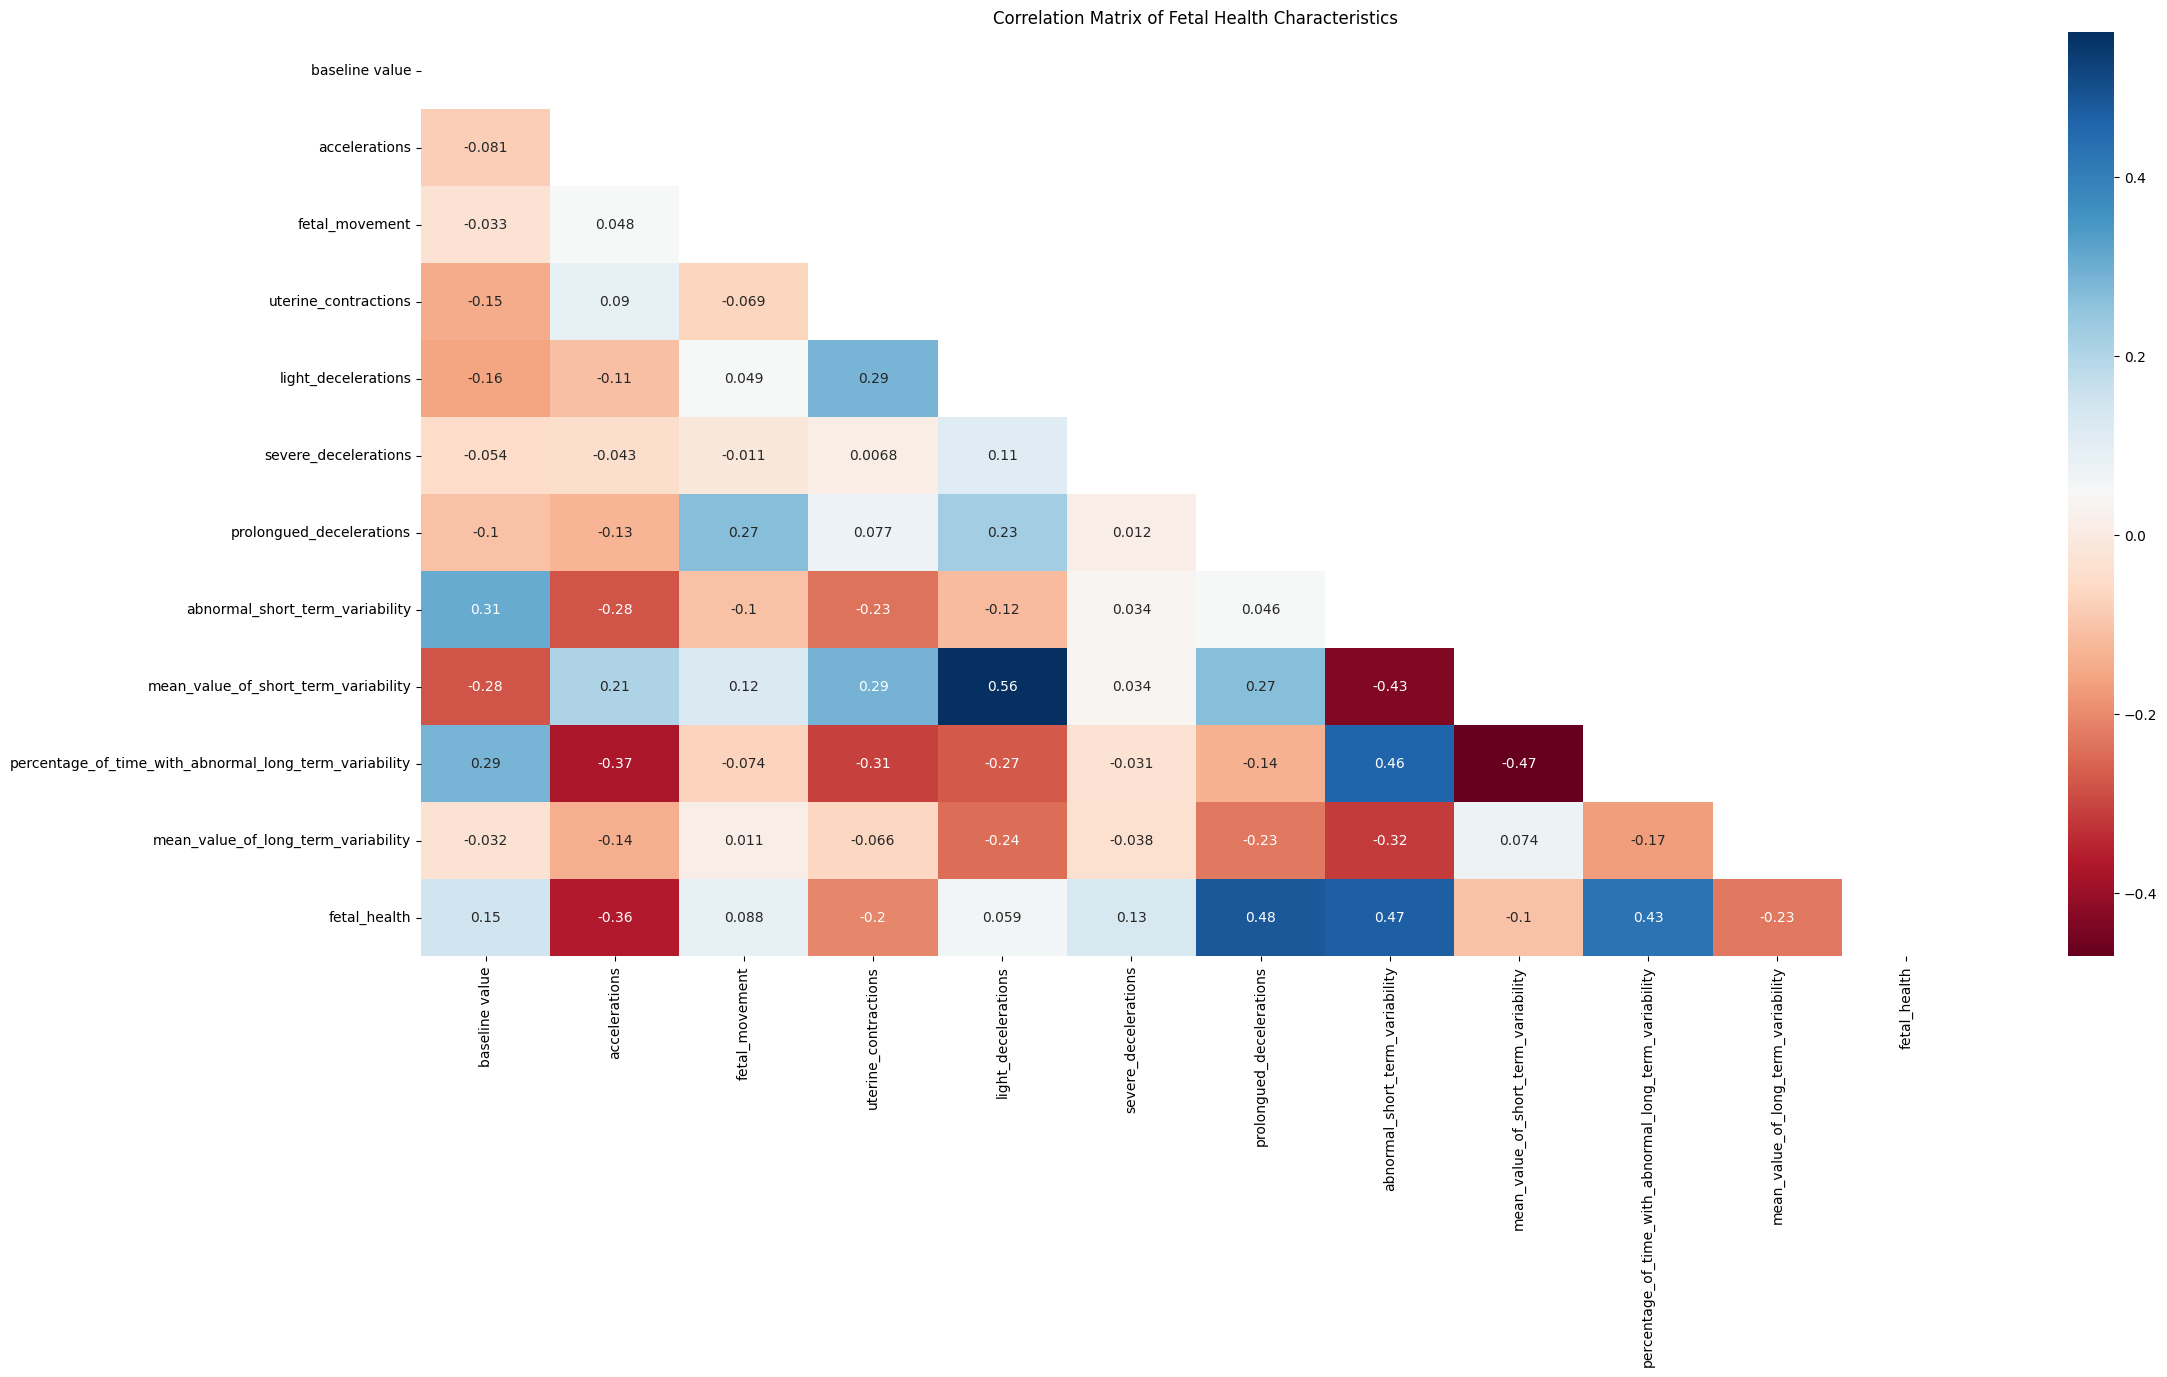

In [259]:
plt.figure(figsize=(25, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', mask = upper_tri_mask)
plt.title("Correlation Matrix of Fetal Health Characteristics")

Y-Intercept[-0.32059067] Coefficient: [[-0.79322598]]


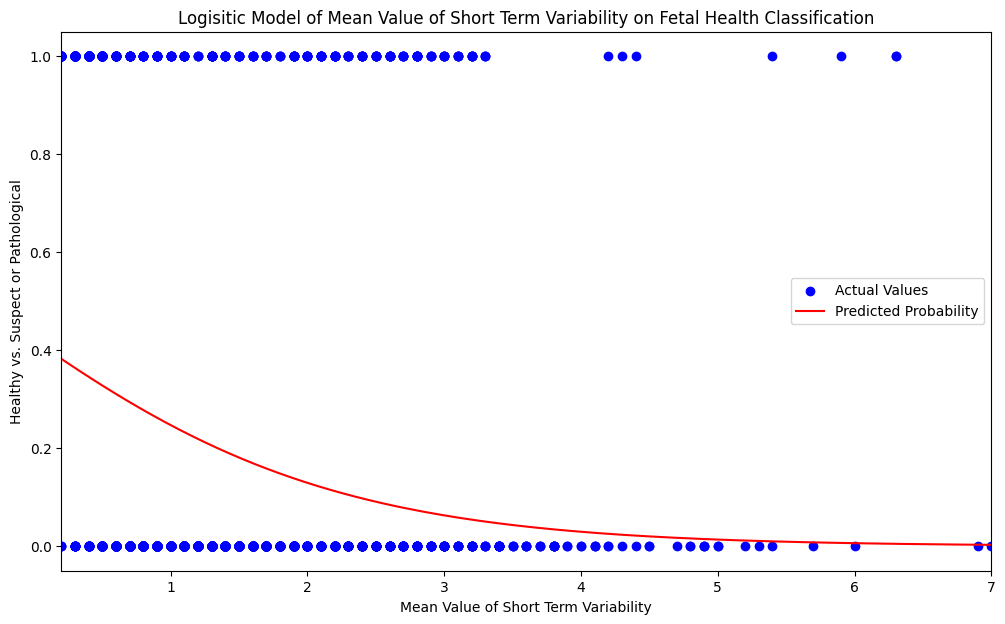

Y-Intercept[-1.2566564] Coefficient: [[0.00157673]]


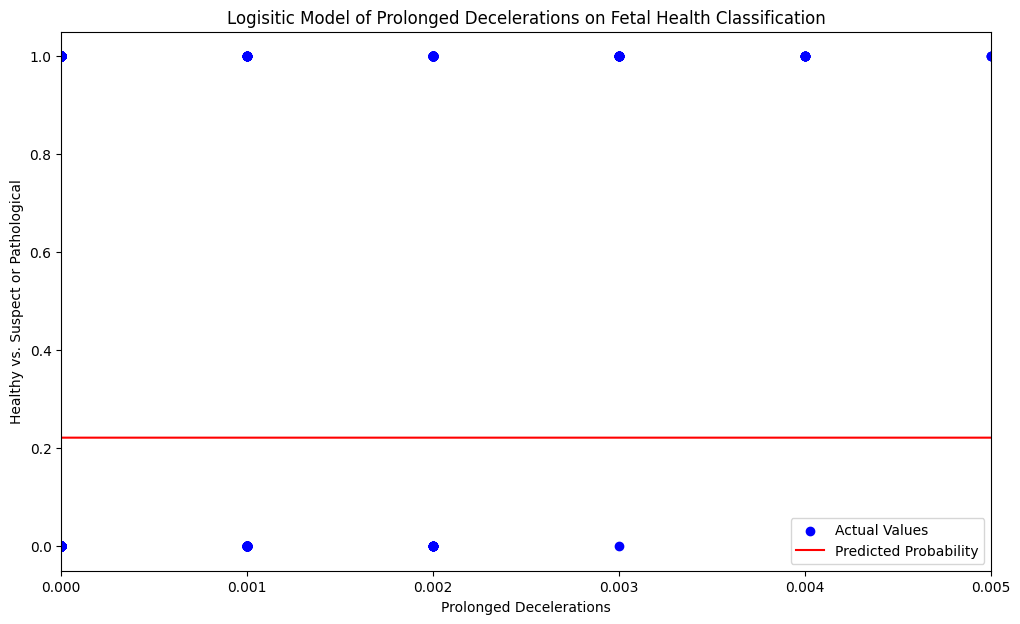

Y-Intercept[-1.25381522] Coefficient: [[-0.69075115]]


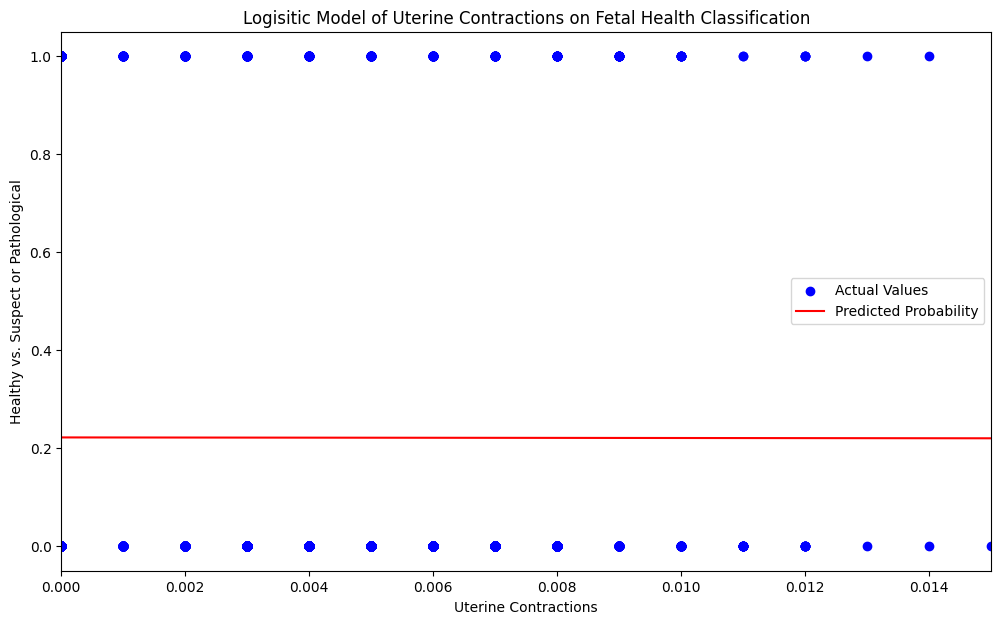

In [385]:
from sklearn.linear_model import LogisticRegression

def reshape_x(var):
  return var.values.reshape(-1, 1)

decelerations = reshape_x(df['prolongued_decelerations'])
st_variability = reshape_x(df['mean_value_of_short_term_variability'])
abn_st_variability = reshape_x(df['abnormal_short_term_variability'])
uter_contract = reshape_x(df['uterine_contractions'])


y_transform = y.apply(lambda x: 0 if x == 1 else 1)

def logistic_reg(x, title):
  reg = LogisticRegression()
  reg.fit(x, y_transform)
  y_pred = reg.predict(x)

  x_range = np.linspace(x.min(), st_variability.max(), 150).reshape(-1, 1)
  y_prob = reg.predict_proba(x_range)[:,1]

  print(f"Y-Intercept{reg.intercept_} Coefficient: {reg.coef_}")

  plt.figure(figsize=(12,7))
  plt.scatter(x, y_transform, color = "blue", label = "Actual Values")
  plt.plot(x_range, y_prob, color = 'red', label = "Predicted Probability")
  plt.title(f"Logisitic Model of {title} on Fetal Health Classification")
  plt.xlabel(title)
  plt.ylabel("Healthy vs. Suspect or Pathological")
  plt.legend()
  plt.xlim(x.min(), x.max())  # Set the x-axis range
  plt.show()

logistic_reg(st_variability, title="Mean Value of Short Term Variability")
logistic_reg(decelerations, title="Prolonged Decelerations")
logistic_reg(uter_contract, title = "Uterine Contractions")


f, 2 points plus shot at lightning talk) Look over your findings from parts (a-e) and summarize anything interesting you learned about the data from doing this study.  The students with the best answers to this question (who also chose to analyze novel datasets) may be selected to give lightning talks for additional extra credit.

**TODO**

In [386]:
"""Despite mean short term variability having a really low correlation with fetal health, the RandomForestRegressor ranks it as the highest importance in reducing error in classification.
Additionally, our logistic regression model finds that a marginal increase in short term variability, the log odds of a negative fetal health outcome decrease by 0.79322598. In other words,
the odds of a negative fetal health outcome are reduced by about 54.78%. """

"""Short-term variability refers to the beat-to-beat changes in the fetal heart rate that occur over short periods (typically seconds to minutes). It provides insights into the autonomic nervous system
and reduced short-term variability can be a sign of poor oxygenation or fetal distress. It is surprisingly a better feature than the other predictors. """


"""Source: Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318"""



'Source: Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318'